In [1]:
import numpy as np
import tensorflow as tf

# 데이터를 학습 데이터와 테스트 데이터로 나눈다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

data_size = x_train.shape[0]
batch_size = 12	# 배치 크기

selected = np.random.choice(data_size, batch_size)
print(selected)
x_batch = x_train[selected]
y_batch = y_train[selected]

[ 3378 59240 42001  3744 38670 12387 58146 37928  8471 12981 57091 24116]


In [2]:
import numpy as np

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

# 가중치를 –1.0에서 1.0 사이의 난수로 초기화한다.
W1 = 2*np.random.random((inputs, hiddens))-1
W2 = 2*np.random.random((hiddens, outputs))-1
B1 = np.zeros(hiddens)
B2 = np.zeros(outputs)

In [3]:
# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다.
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다.
        layer1 = actf(Z1)		# 활성화 함수를 적용한다.
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다.
        layer2 = actf(Z2)		# 활성화 함수를 적용한다.
        return layer0, layer1, layer2

In [4]:
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(60000):
            layer0, layer1, layer2 = predict(X)
            layer2_error = layer2-T

            layer2_delta = layer2_error*actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta, W2.T)
            layer1_delta = layer1_error*actf_deriv(layer1)

            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/4.0
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/4.0
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)/4.0
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)/4.0

def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))		# 하나여도 2차원 형태이어야 한다.
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)

fit()
test()

[[0 0]] [0] [[0.01377722]]
[[0 1]] [1] [[0.98428429]]
[[1 0]] [1] [[0.9869629]]
[[1 1]] [0] [[0.0122837]]


In [5]:
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) #①
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #②
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(0.3))

model.summary()

X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=1000)

print( model.predict(X) )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.4241
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2726  
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2572 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3602  
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3159 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3434 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2941 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2327 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3026 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2815  
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2774 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2408 
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2669 
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2725  
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2490 

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)


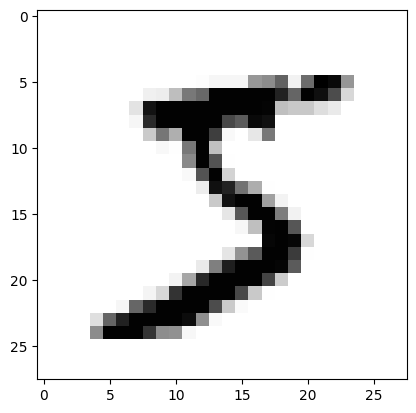

In [7]:
print(train_images.shape)

print(train_labels)
print(test_images.shape)

plt.imshow(train_images[0], cmap="Greys")

In [8]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])

In [10]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

In [11]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7876 - loss: 0.0423
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9276 - loss: 0.0136
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9452 - loss: 0.0103
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9547 - loss: 0.0085
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9614 - loss: 0.0074


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9563 - loss: 0.0082
테스트 정확도: 0.9628000259399414


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.0066
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9700 - loss: 0.0060
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0054
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0050
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0047


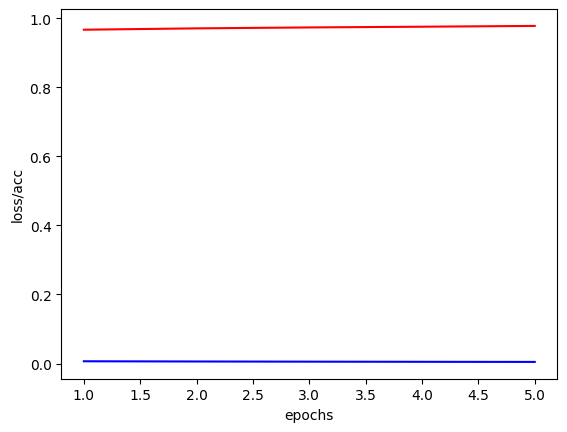

In [14]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()


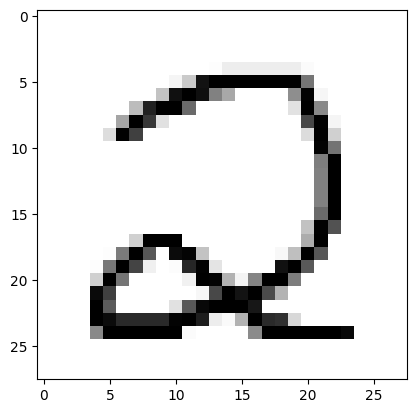

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
추정된 숫자= 2


In [15]:
import cv2 as cv

image = cv.imread('test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

y_true = np.array([[0., 1.], [0., 0.]])
y_pred = np.array([[1., 1.], [1., 0.]])
mse = tf.keras.losses.MeanSquaredError()
print(mse(y_true, y_pred).numpy())

0.5


In [19]:
y_true = np.array([[0., 1.], [0., 0.]])
y_pred = np.array([[0.6, 0.4], [0.4, 0.6]])
bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true, y_pred).numpy())

0.8149245


In [20]:
y_true = np.array([[0, 1, 0], [0, 0, 1]])	# 원-핫 표현으로 부류를 나타낸다.
y_pred = np.array([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
cce = tf.keras.losses.CategoricalCrossentropy()
print(cce(y_true, y_pred).numpy())

1.1769392


In [22]:
y_true = np.array([1, 2])		# 정수로 부류를 나타낸다. 0, 1, 2가 가능함
y_pred = np.array([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
scce = tf.keras.losses.SparseCategoricalCrossentropy()
print(scce(y_true, y_pred).numpy())

1.1769392


In [23]:
m = tf.keras.metrics.Accuracy()
m.update_state(	[[1], [2], [3], [4]],
			[[0], [2], [3], [4]])
print(m.result().numpy())

0.75


In [24]:
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state([[0,   0,     1], [0,    1,     0]],
                 [[0.1, 0.9, 0.8], [0.05, 0.95, 0]])
print(m.result().numpy())

0.5


In [25]:
!pip install scikeras

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# 데이터 세트 준비
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# 신경망 모델 구축
def build_model():
    network = tf.keras.models.Sequential()
    network = tf.keras.models.Sequential()
    network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    network.add(tf.keras.layers.Dense(10, activation='sigmoid'))

    network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network

# 하이퍼 매개변수 딕셔너리
param_grid = {
              'epochs':[1, 2, 3],	# 에포크 수: 1, 2, 3
              'batch_size':[32, 64]	# 배치 크기: 32, 64
             }

# 케라스 모델을 sklearn에서 사용하도록 포장한다.
model = KerasClassifier(build_fn = build_model, verbose=1)

# 그리드 검색
gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1
)

# 그리드 검색 결과 출력
grid_result = gs.fit(train_images, train_labels)
print(grid_result.best_score_)
print(grid_result.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8989 - loss: 0.3399
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9737 - loss: 0.0900
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9818 - loss: 0.0592
0.9721833333333333
{'batch_size': 32, 'epochs': 3}
